# Basics of Statistics. Part II

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1.1. Titanik dataset download  
Downloading from Kaggle

In [ ]:
# !pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/competitions/titanic/data')

100%|██████████| 34.1k/34.1k [00:00<00:00, 2.69MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


## 1.2. Загрузка данных в блокнот

In [ ]:
import sys
import os
tit_dir = os.path.abspath(os.path.join(os.getcwd(), 'titanic'))
# os.makedirs(tit_dir, exist_ok=True)
sys.path.append(tit_dir)

In [ ]:
train_f = os.path.join(tit_dir, 'train.csv')
test_f = os.path.join(tit_dir, 'test.csv')
gen_subm_f = os.path.join(tit_dir, 'gender_submission.csv')

In [ ]:
def read_csv(f_dir):
    df = pd.read_csv(f_dir)
    print('Shape:', df.shape)
    return df

In [ ]:
df = read_csv(train_f)
df.head(3)

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# df_te = read_csv(test_f)
# df_te.head()

In [ ]:
# df_g_s = read_csv(gen_subm_f)
# df_g_s.head()

In [ ]:
# pd.concat(df, pd.merge(df_te, df_g_s, on='PassengerId'))

In [ ]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## 2.1. Модель без предикторов / Intercept only model

In [ ]:
log_reg0 = smf.logit("Survived ~ 1", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.665912
         Iterations 4


In [ ]:
print(log_reg0.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:               1.092e-10
Time:                        23:37:31   Log-Likelihood:                -593.33
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.000      -0.608      -0.338


In [ ]:
log_reg0.params

Intercept   -0.473288
dtype: float64

Y = intercept  
intercept = log$(\frac{p}{1-p})$

Коэффициент значимо меньше нуля (-0,47 и p_val = 0.000), а значит шансы выжить значимо меньше чем не выжить.

Теперь вручную:

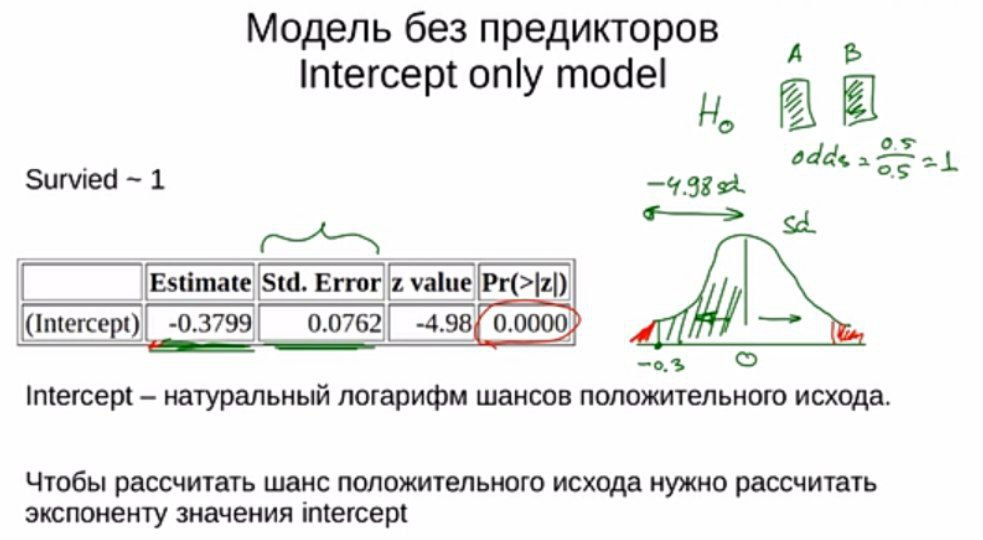

In [ ]:
sur_vc = df['Survived'].value_counts()
sur_vc

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
odds = sur_vc[1] / sur_vc[0]
odds

0.6229508196721312

Шанс меньше 1

In [ ]:
np.log(odds)

-0.4732877044469254

In [ ]:
np.exp(-0.473)

0.6231300711776578

In [ ]:
def log_odds(pos, neg):
    # Calculate logarithm of odds by number of positive and negative cases
    odds = pos / neg
    log_odds = np.log(odds)
    return log_odds

In [ ]:
log_odds(sur_vc[1], sur_vc[0])

-0.4732877044469254

Логарифм шансов == Интерсепту

## 2.2. Модель с 1м номинативным предиктором

In [ ]:
log_reg1 = smf.logit("Survived ~ Sex", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5


In [ ]:
print(log_reg1.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.2266
Time:                        23:37:31   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.020e-60
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      0.000       0.804       1.309
Sex[T.male]    -2.5137      0.167    -15.036      0.000      -2.841      -2.186


In [ ]:
log_reg1.params

Intercept      1.056589
Sex[T.male]   -2.513710
dtype: float64

**Intercept == Шансы выжить для женщин  
Sex[T.male] == Отношение шансов выжить у мужчин к женщинам**

Теперь вручную:

In [ ]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
odds_male = 109 / 468
odds_female = 233/81
odds_male, odds_female

(0.2329059829059829, 2.876543209876543)

In [ ]:
np.log(odds_female)

1.0565892988932617

In [ ]:
np.log(odds_male)

-1.457120413688503

In [ ]:
odds_ratio = odds_male / odds_female
odds_ratio

0.08096731594585672

In [ ]:
np.log(odds_ratio)

-2.5137097125817647


N | Survival | Sex F | Sex M
-|---|---|---
1|0|0|1
2|1|0|1
3|0|1|1
4|1|1|1

Sex_F + Sex_M == 1 Всегда, строгая мультиколлинеарность

| |  
| |  
\ /  

N | Survival | Sex M
-|---|---
1|0|1
2|1|1
3|0|1
4|1|1


Intercept      1.056589  
Sex[T.male]   -2.513710  
$log(\frac{p}{1-p})$ = 1.05 - 2.51·Sex_M  
Если женщина: 1.05 - 2.51·0 = 1.05 == intercept == log odds_f  
Если мужчина: 1.05 - 2.51·1 = -1.46 == log odds_m  
Шансы женщин превышают шансы мужчин: exp(2.51)

In [ ]:
# from statsmodels.stats.anova import anova_lm
# anova_results = anova_lm(log_reg0, log_reg1, test='Chisq')
# print(anova_results)
# # AttributeError: 'LogitResults' object has no attribute 'ssr'

## 2.3. Модель с 2мя номинативными предикторами

In [ ]:
df['Pclass'] = df['Pclass'].astype('int64')

In [ ]:
family=sm.families.Binomial()
log_reg2 = smf.logit("Survived ~ Sex * C(Pclass)", data=df).fit() # , family=family
# + по отдельности
# * также и взаимодействие
# C() - categorical data

Optimization terminated successfully.
         Current function value: 0.447866
         Iterations 7


In [ ]:
print(log_reg2.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.3274
Time:                        23:37:31   Log-Likelihood:                -399.05
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.670e-82
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.4122      0.587      5.815      0.000       2.262       4.562
Sex[T.male]                   -3.9494      0.616     -6.411      0.000      -5.157 

In [ ]:
log_reg2.params

Intercept                     3.412247
Sex[T.male]                  -3.949390
C(Pclass)[T.2]               -0.955511
C(Pclass)[T.3]               -3.412247
Sex[T.male]:C(Pclass)[T.2]   -0.184992
Sex[T.male]:C(Pclass)[T.3]    2.095755
dtype: float64

***Intercept*** - логарифм шансов положительного исхода для женщин в 1 классе  
$log(odds(f 1))$

***Sex[T.male]*** - логарифм отношения шансов для женщин в 1м классе и мужчин в 1м классе (переход на мужчин в 1 классе)  
$log(\frac{odds(m 1)}{odds(f 1)})$  

***C(Pclass)[T.2]*** - логарифм отношения шансов для женщин в 1м и 2м классах  
$log(\frac{odds(f 2)}{odds(f 1)})$

***C(Pclass)[T.3]*** - логарифм отношения шансов для женщин в 1м и 2м классах  
$log(\frac{odds(f 3)}{odds(f 1)})$

***Sex[T.male]:C(Pclass)[T.2]*** - разность логарифмов отношения шансов, рассчитанного для мужчин и женщин в 1м и 2м классах  
$log(\frac{odds(m 2)}{odds(f 2)}) - log(\frac{odds(m 1)}{odds(f 1)})$

***Sex[T.male]:C(Pclass)[T.3]*** - разность логарифмов отношения шансов, рассчитанного для мужчин и женщин в 1м и 3м классах  
$log(\frac{odds(m 3)}{odds(f 3)}) - log(\frac{odds(m 1)}{odds(f 1)})$

$log(\frac{p}{1-p})$=Int + M + Cl2 + Cl3 + M * Cl2 + M * Cl3

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df_male = df[df['Sex']=='male']
df_female = df[df['Sex']=='female']

In [ ]:
print('male')
pd.crosstab(df_male['Survived'], df_male['Pclass'])

male


Pclass,1,2,3
Survived,,,
0,77,91,300
1,45,17,47


In [ ]:
print('female')
pd.crosstab(df_female['Survived'], df_female['Pclass'])

female


Pclass,1,2,3
Survived,,,
0,3,6,72
1,91,70,72


In [ ]:
# Intercept - женщины в 1 классе
f_p1_odds = log_odds(91, 3)
f_p1_odds

3.41224721784874

In [ ]:
# Sex[T.male] - переход на мужчин в 1 классе
m_p1_odds = log_odds(45, 77)
m_p1_odds

-0.5371429320833642

In [ ]:
log_reg2.params

Intercept                     3.412247
Sex[T.male]                  -3.949390
C(Pclass)[T.2]               -0.955511
C(Pclass)[T.3]               -3.412247
Sex[T.male]:C(Pclass)[T.2]   -0.184992
Sex[T.male]:C(Pclass)[T.3]    2.095755
dtype: float64

In [ ]:
m_f_p1_odds = log_odds(45/77, 91/3)
m_f_p1_odds

-3.9493901499321042

In [ ]:
# pclass 2nd
f_p1_p2_odds = log_odds(70/6, 91/3)
f_p1_p2_odds

-0.9555114450274363

In [ ]:
# pclass 3rd
f_p1_p3_odds = log_odds(72/72, 91/3)
f_p1_p3_odds

-3.41224721784874

In [ ]:
# Sex[T.male]:C(Pclass)[T.2]
m_p2_odds = 17/91
f_p2_odds = 70/6
m_f_p2_odds = (17/91) / (70/6)
m_f_p2_odds

0.016012558869701727

In [ ]:
m_p1_odds = 45/77
f_p1_odds = 91/3
m_f_p1_odds = (45/77) / (91/3)
m_f_p1_odds

0.01926644783787641

In [ ]:
np.log(m_f_p2_odds) - np.log(m_f_p1_odds)

-0.1849917853498333

In [ ]:
# Sex[T.male]:C(Pclass)[T.3]
m_p3_odds = 47/300
f_p3_odds = 72/72
m_f_p3_odds = (47/300) / (72/72)
m_f_p3_odds

0.15666666666666668

In [ ]:
np.log(m_f_p3_odds) - np.log(m_f_p1_odds)

2.0957552769859618

In [ ]:
log_reg2.params

Intercept                     3.412247
Sex[T.male]                  -3.949390
C(Pclass)[T.2]               -0.955511
C(Pclass)[T.3]               -3.412247
Sex[T.male]:C(Pclass)[T.2]   -0.184992
Sex[T.male]:C(Pclass)[T.3]    2.095755
dtype: float64

In [ ]:
# Пример:
# М 3
3.41-3.94+0-3.41+0+2.09

-1.85

In [ ]:
np.exp(-1.85)

0.1572371663136276

In [ ]:
47/300

0.15666666666666668

## 2.4. Числовая переменная

In [ ]:
family=sm.families.Binomial()
log_reg2a = smf.logit("Survived ~ Sex + C(Pclass)+ Age", data=df).fit() # , family=family

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


In [ ]:
print(log_reg2a.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Thu, 16 Feb 2023   Pseudo R-squ.:                  0.3289
Time:                        00:38:15   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.074e-67
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
Sex[T.male]       -2.5228      0.207    -12.164      0.000      -2.929      -2.116
C(Pclass)[T.2]    -1.3098      0.278

База - возраст == 0

https://songhuiming.github.io/pages/2016/07/12/statsmodels-regression-examples/